# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Daryl Fauzan
- **Email:** darylfauzan25@gmail.com
- **ID Dicoding:** ryls93

## Menentukan Pertanyaan Bisnis

1. Bagaimana trend total penjualan perusahaan dari waktu ke waktu?
2. Kategori Produk apa yang menghasilkan pendapatan terbesar dan terkecil untuk perusahaan kita?
3. Kategori Produk apa yang banyak dan sedikit dibeli oleh customer?
4. Kota apa saja yang paling banyak dan sedikit membeli produk kita?
5. Berapa perbandingan order yang sudah terkirim dan belum terkirim?
6. Metode payment apa yang sering digunakan oleh customer?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

## Data Wrangling

### Gathering Data

In [2]:
orders =  pd.read_csv("E-Commerce Public Dataset/orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
order_items = pd.read_csv("E-Commerce Public Dataset/order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
customers = pd.read_csv("E-Commerce Public Dataset/customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
products = pd.read_csv("E-Commerce Public Dataset/products_dataset.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
product_categories = pd.read_csv("E-Commerce Public Dataset/product_category_name_translation.csv")
product_categories.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [7]:
payments = pd.read_csv("E-Commerce Public Dataset/order_payments_dataset.csv")
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Assessing Data

In [8]:
# fungsi untuk mengubah nama variable menjadi string
def get_var_name(var):
    for name, value in globals().items():
        if value is var:
            return name

#### 1. Memeriksa semua info di setiap table

In [9]:
for data in [orders, order_items, customers, products, product_categories, payments]:
    name = get_var_name(data)
    print(name)
    print(data.info())
    print("=========================================\n")

orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

order_items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id            

#### 2. Menghitung data duplicate pada setiap tabel

In [10]:
for data in [orders, order_items, customers, products, product_categories, payments]:
    name = get_var_name(data)
    print(f"{name}: {data.duplicated().sum()}")

orders: 0
order_items: 0
customers: 0
products: 0
product_categories: 0
payments: 0


#### 3. Menghitung data null pada setiap tabel

In [11]:
for data in [orders, order_items, customers, products, product_categories, payments]:
    name = get_var_name(data)
    print(name)
    print(data.isna().sum())
    print("=========================================\n")

orders
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

order_items
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

customers
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

products
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm   

1. data dengan tipe timestamp masih berbentuk object
2. tidak terdapat data duplikasi pada semua tabel
3. Terdapat data null pada tabel orders dan products

### Cleaning Data

#### 1. Memperbaiki tipe tanggal timestamp

In [12]:
# memperbaiki pada tabel orders
for col in orders.drop(columns = ["order_id", "customer_id", "order_status"]).columns:
    orders[col] = pd.to_datetime(orders[col])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [13]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [14]:
# memperbaiki pada tabel order_items
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"])
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [15]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### 2. Memperbaiki data null

karena pada penelitian ini kita tidak membutuhkan kolom tersebut pada tabel orders, maka kita akan menghapus kolom-kolom yang membuat data null. Khusus untuk kolom "order_approved_at", data null tersebut menandakan kalau barang yang dipesan tidak dikonfirmasi, atau transaksi gagal. Oleh karena itu, kita akan biarkan baris null yang disebabkan oleh kolom "order_approved_at"

In [16]:
for col in orders.columns:
    if orders[col].isna().sum()  > 0 and col != "order_approved_at":
        orders.drop(columns = col, inplace = True)

orders.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                160
order_estimated_delivery_date      0
dtype: int64

In [17]:
orders[orders["order_approved_at"].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,2017-05-30
...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,2018-10-01


Sukar untuk track data null yang terdapat pada tabel produk. Oleh karena itu, kita hapus baris yang mengandung data null

In [18]:
products.dropna(inplace = True)

products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


## Exploratory Data Analysis (EDA)

In [19]:
# Menggabungkan semua tabel menjadi 1 tabel
all_df = orders.merge(order_items, on = "order_id", how = "left")
all_df = all_df.merge(customers, on = "customer_id", how = "left")
all_df = all_df.merge(products, on = "product_id", how = "left")
all_df = all_df.merge(product_categories, on = "product_category_name", how = "left")
all_df = all_df.merge(payments, on = "order_id", how = "left")

all_df.to_csv("E-Commerce Merge.csv")
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,4.0,500.0,19.0,8.0,13.0,housewares,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,4.0,500.0,19.0,8.0,13.0,housewares,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,4.0,500.0,19.0,8.0,13.0,housewares,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,...,1.0,400.0,19.0,13.0,19.0,perfumery,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,...,1.0,420.0,24.0,19.0,21.0,auto,1.0,credit_card,3.0,179.12


In [20]:
all_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_estimated_delivery_date', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [53]:
city =  ["sao paulo", "santa rosa"]
category = ["health_beauty"]

main_df = all_df[(all_df["order_approved_at"].dt.date.astype("str") >= "2016-01-01") & 
             (all_df["order_approved_at"].dt.date.astype("str") <= "2018-09-03") & 
             (all_df["customer_city"].isin(city)) &
             (all_df["product_category_name_english"].isin(category))]

main_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
26,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-09-28,1.0,5ac9d9e379c606e36a8094a6046f75dc,633ecdf879b94b5337cca303328e4a25,2017-09-25 04:04:09,...,6.0,525.0,21.0,16.0,13.0,health_beauty,1.0,boleto,1.0,118.86
27,f848643eec1d69395095eb3840d2051e,4fa1cd166fa598be6de80fa84eaade43,delivered,2018-03-15 08:52:40,2018-03-15 09:09:31,2018-03-29,1.0,2b4609f8948be18874494203496bc318,cc419e0650a3c5ba77189a1882b7556a,2018-03-23 09:09:31,...,3.0,250.0,22.0,10.0,18.0,health_beauty,1.0,credit_card,4.0,88.90
157,01855f880aae9a984c7c33b26fcf2e02,2e068340b3037f667ce3224bd59260af,delivered,2017-10-19 15:08:48,2017-10-19 15:35:35,2017-10-31,1.0,12bc892d6fff0dc42c8177f3665ef00e,e9779976487b77c6d4ac45f75ec7afe9,2017-10-25 15:35:35,...,10.0,100.0,28.0,13.0,12.0,health_beauty,1.0,credit_card,2.0,95.52
158,01855f880aae9a984c7c33b26fcf2e02,2e068340b3037f667ce3224bd59260af,delivered,2017-10-19 15:08:48,2017-10-19 15:35:35,2017-10-31,2.0,12bc892d6fff0dc42c8177f3665ef00e,e9779976487b77c6d4ac45f75ec7afe9,2017-10-25 15:35:35,...,10.0,100.0,28.0,13.0,12.0,health_beauty,1.0,credit_card,2.0,95.52
185,95cf9f239f724799131f7ca949209bd9,7251aa758779438faea714941f1051c4,delivered,2018-05-25 08:54:21,2018-05-25 09:16:24,2018-06-12,1.0,7a295e6687ed3e00c8143498115f6ca5,2e1c9f22be269ef4643f826c9e650a52,2018-05-29 09:16:24,...,1.0,353.0,36.0,6.0,16.0,health_beauty,1.0,credit_card,1.0,97.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118287,3c042ee4b8b597c3d265a93a21bbf99f,d71a0d0cf6bbacec526203263382501b,delivered,2018-06-23 18:22:41,2018-06-23 18:35:32,2018-07-26,1.0,71806ae7a741f21e27a83b42237b2405,bbf9ad41dca6603e614efcdad7aab8c4,2018-06-28 18:35:32,...,4.0,16050.0,97.0,20.0,70.0,health_beauty,1.0,credit_card,8.0,632.23
118310,b4cec7d0224b919cac7a6d513cc0884f,95e719d72780395652555c67d60d1530,delivered,2018-02-06 12:46:51,2018-02-07 02:56:12,2018-02-26,1.0,ffc9caf33e2d1e9f44e3e06da19085f7,b18dc380845b24038cfc48006478f099,2018-02-15 02:56:12,...,1.0,2134.0,25.0,22.0,16.0,health_beauty,1.0,boleto,1.0,212.49
118384,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-04-02,1.0,149de4383ccb1829ea75380fc5f0b5fa,620c87c171fb2a6dd6e8bb4dec959fc6,2018-03-19 22:30:45,...,1.0,750.0,18.0,19.0,23.0,health_beauty,1.0,credit_card,10.0,269.53
118394,c2af225ac9a68a3c24500aa6fab006aa,f93c9e539a9705a57902c625b611e90c,delivered,2018-08-20 10:04:30,2018-08-20 14:53:46,2018-08-28,1.0,dc6fe08afddfeb23ce334ce4cf5890eb,11bfa66332777660bd0640ee84d47006,2018-08-22 14:53:46,...,1.0,200.0,16.0,4.0,16.0,health_beauty,1.0,credit_card,1.0,43.87


In [22]:
all_df.describe().T

,count,mean,min,25%,50%,75%,max,std
order_purchase_timestamp,118434,2017-12-30 04:00:24.559636480,2016-09-04 21:15:19,2017-09-11 12:53:55.249999872,2018-01-17 17:57:56.500000,2018-05-03 19:05:01,2018-10-17 17:30:18,NaN
order_approved_at,118258,2017-12-30 14:12:31.341397248,2016-09-15 12:16:38,2017-09-11 22:45:23,2018-01-18 02:11:35,2018-05-04 02:51:40.249999872,2018-09-03 17:40:06,NaN
order_estimated_delivery_date,118434,2018-01-23 00:31:38.941182208,2016-09-30 00:00:00,2017-10-02 00:00:00,2018-02-14 00:00:00,2018-05-25 00:00:00,2018-11-12 00:00:00,NaN
order_item_id,117604.0,1.19592,1.0,1.0,1.0,1.0,21.0,0.697721
shipping_limit_date,117604,2018-01-06 07:26:40.064649216,2016-09-19 00:15:34,2017-09-18 22:13:59.500000,2018-01-25 11:57:47.500000,2018-05-10 07:50:37.249999872,2020-04-09 22:35:08,NaN
price,117604.0,120.822849,0.85,39.9,74.9,134.9,6735.0,184.477367
freight_value,117604.0,20.045551,0.0,13.08,16.29,21.19,409.68,15.861351
customer_zip_code_prefix,118434.0,35034.264392,1003.0,11310.0,24240.0,58464.5,99990.0,29819.290218
product_name_lenght,115905.0,48.767111,5.0,42.0,52.0,57.0,76.0,10.035151
product_description_lenght,115905.0,786.956628,4.0,347.0,601.0,985.0,3992.0,653.031785


In [23]:
all_df.describe(include = "object").T

,count,unique,top,freq
order_id,118434,99441,895ab968e7bb0d5659d16cd74cd1650c,63
customer_id,118434,99441,270c23a11d024a44c896d1894b261a83,63
order_status,118434,8,delivered,115038
product_id,117604,32951,aca2eb7d00ea1a7b8ebd4e68314663af,536
seller_id,117604,3095,4a3ca9315b744ce9f8e9374361493884,2133
customer_unique_id,118434,96096,9a736b248f67d166d2fbb006bcb877c3,75
customer_city,118434,4119,sao paulo,18738
customer_state,118434,27,SP,49967
product_category_name,115905,73,cama_mesa_banho,11823
product_category_name_english,115880,71,bed_bath_table,11823


In [24]:
all_df.describe(include = "datetime64[ns]").T

,count,mean,min,25%,50%,75%,max
order_purchase_timestamp,118434,2017-12-30 04:00:24.559636480,2016-09-04 21:15:19,2017-09-11 12:53:55.249999872,2018-01-17 17:57:56.500000,2018-05-03 19:05:01,2018-10-17 17:30:18
order_approved_at,118258,2017-12-30 14:12:31.341397248,2016-09-15 12:16:38,2017-09-11 22:45:23,2018-01-18 02:11:35,2018-05-04 02:51:40.249999872,2018-09-03 17:40:06
order_estimated_delivery_date,118434,2018-01-23 00:31:38.941182208,2016-09-30 00:00:00,2017-10-02 00:00:00,2018-02-14 00:00:00,2018-05-25 00:00:00,2018-11-12 00:00:00
shipping_limit_date,117604,2018-01-06 07:26:40.064649216,2016-09-19 00:15:34,2017-09-18 22:13:59.500000,2018-01-25 11:57:47.500000,2018-05-10 07:50:37.249999872,2020-04-09 22:35:08


### Pertanyaan 1: Bagaimana trend total penjualan perusahaan dari waktu ke waktu?

In [25]:
all_df["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

Melihat trend pendapatan dari barang yang tersedia dan tidak di-*cancel*

In [26]:
# create trend dataframe
trend = all_df[["order_approved_at", "price"]][(all_df["order_status"]!= "canceled") & 
                                               (all_df["order_status"]!= "unavailable")].groupby("order_approved_at").sum().reset_index()

# Create a year-month datetime
trend["order_approved_at"] = trend["order_approved_at"].dt.year.astype("str") + "-" + trend["order_approved_at"].dt.month.astype("str")
trend["order_approved_at"] = pd.to_datetime(trend["order_approved_at"])
trend = trend.groupby("order_approved_at").sum().reset_index()

#rename column
trend.rename(columns = {"price": "Revenue",
                        "order_approved_at" : "date"}, inplace = True)

trend

,date,Revenue
0,2016-09-01,134.97
1,2016-10-01,46014.76
2,2016-12-01,10.90
3,2017-01-01,122841.33
4,2017-02-01,258678.15
5,2017-03-01,386715.32
6,2017-04-01,383438.36
7,2017-05-01,543737.67
8,2017-06-01,453789.10
9,2017-07-01,521107.83


### Pertanyaan 2: Kategori Produk apa yang menghasilkan pendapatan terbesar dan terkecil untuk perusahaan kita?

produk yang menghasilkan pendapatan adalah produk yang tersedia dan pembeliannya tidak dibatalkan

In [27]:
# create revenue per category dataframe
revenue_per_category = all_df[(all_df["order_status"]!= "canceled") & 
                        (all_df["order_status"]!= "unavailable")]\
                        [["product_category_name_english", "price"]].groupby("product_category_name_english").sum().reset_index()

# rename column
revenue_per_category.rename(columns = {"price": "Revenue",
                                       "product_category_name_english": "Category"}, inplace = True)

#sort the data
revenue_per_category.sort_values(by = "Revenue", ascending = False, inplace = True)

revenue_per_category

,Category,Revenue
43,health_beauty,1294329.27
70,watches_gifts,1246322.83
7,bed_bath_table,1091526.40
65,sports_leisure,1015652.39
15,computers_accessories,934645.27
...,...,...
35,flowers,1110.04
46,home_comfort_2,773.17
11,cds_dvds_musicals,730.00
29,fashion_childrens_clothes,569.85


### Pertanyaan 3: Kategori Produk apa yang banyak dan sedikit dibeli oleh customer?

produk yang menghasilkan pendapatan adalah produk yang tersedia dan pembeliannya tidak dibatalkan

In [28]:
# create revenue per category dataframe
item_per_category = all_df[(all_df["order_status"]!= "canceled") & 
                        (all_df["order_status"]!= "unavailable")]\
                        [["product_category_name_english", "order_id"]].groupby("product_category_name_english").count().reset_index()

# rename column
item_per_category.rename(columns = {"order_id": "Number of Order",
                                       "product_category_name_english": "Category"}, inplace = True)

#sort the data
item_per_category.sort_values(by = "Number of Order", ascending = False, inplace = True)

item_per_category

,Category,Number of Order
7,bed_bath_table,11805
43,health_beauty,9935
65,sports_leisure,8893
39,furniture_decor,8707
15,computers_accessories,8036
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


### Pertanyaan 4: Kota apa saja yang paling banyak dan sedikit membeli produk kita?

produk yang dibeli adalah produk yang tersedia dan pembeliannya tidak dibatalkan

In [29]:
# Create dataframe
buyer_per_city = all_df[(all_df["order_status"]!= "canceled") & 
                        (all_df["order_status"]!= "unavailable")]\
                        [["customer_city", "order_id"]].groupby("customer_city").nunique().reset_index()

# rename columns
buyer_per_city.rename(columns = {"customer_city": "City", "order_id": "Number of Order"}, inplace = True)

#sort values
buyer_per_city.sort_values(by = "Number of Order", ascending = False, inplace = True)

buyer_per_city

,City,Number of Order
3587,sao paulo,15291
3146,rio de janeiro,6801
452,belo horizonte,2737
557,brasilia,2112
1141,curitiba,1502
...,...,...
805,capivari do sul,1
1299,estrela velha,1
806,capoeiras,1
2458,nortelandia,1


### Pertanyaan 5: Berapa perbandingan order yang sudah terkirim dan belum terkirim?

In [30]:
# hitung jumlah tiap status pemesanan
status = all_df["order_status"].value_counts()
status

order_status
delivered      115038
shipped          1245
canceled          745
unavailable       650
processing        375
invoiced          373
created             5
approved            3
Name: count, dtype: int64

### Pertanyaan 6: Metode payment apa yang sering digunakan oleh customer?

In [31]:
pay_method = all_df["payment_type"].value_counts()
pay_method

payment_type
credit_card    87286
boleto         23037
voucher         6407
debit_card      1698
not_defined        3
Name: count, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana trend total penjualan perusahaan dari waktu ke waktu?

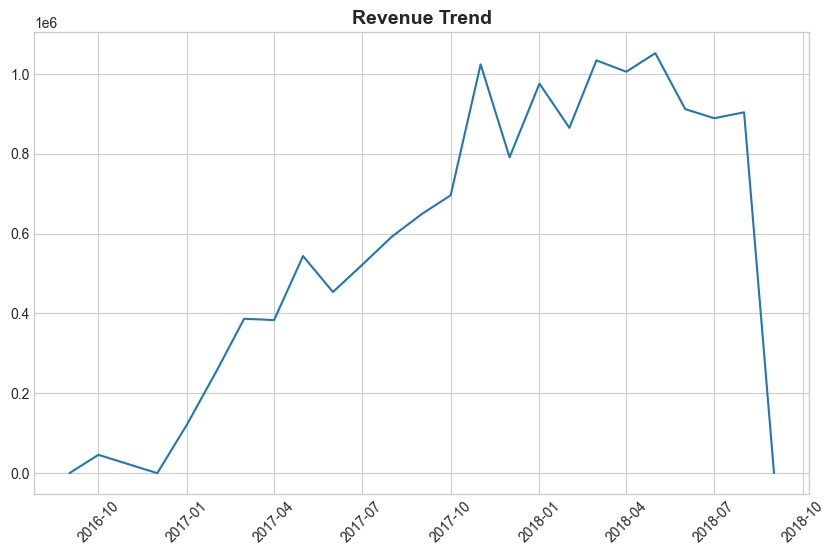

In [32]:
# Create figure and axes
fig, ax = plt.subplots(figsize = (10,6))

# Create lineplot
sns.lineplot(data = trend, x = "date", y = "Revenue")

# Create title and label
ax.set_title("Revenue Trend", fontsize = 14, fontweight = "bold")

plt.xticks(rotation = 45)

ax.set_ylabel("")
ax.set_xlabel("")

plt.show()

Pendapatan perbulan dari tahun 2016 Cenderung naik. Namun, terdapat beberapa anomali penjualan, yaitu pada November 2016 hingga Desember 2016. Pada November 2016, perusahaan tidak memiliki pemasukkan sama sekali. Tidak ada catatan pemesanan sama sekali pada November 2016. pada Desember 2016, transaksi pemesanan sudah mulai ada walau tidak secara signifikan. Hal tersebut mempengaruhi pendapatan pada November 2016 hingga Desember 2016. Bulan-bulen berikutnya, perusahaan mengalami peningkatan yang signifikan dan mencapai 500 ribu dollar pada Mei 2017. Pada September 2019, grafik menunjukkan penurunan yang signifikan, tetapi hal ini tidak mengartikan perusahaan mengalami penurunan pendapatan. Hal itu disebabkan data terbaru yang dimiliki hanya sampai 3 September 2018. Masih tinggi potensial perusahaan memiliki nilai pendapatan yang lebih tinggi.

### Pertanyaan 2: Kategori Produk apa yang menghasilkan pendapatan terbesar dan terkecil untuk perusahaan kita?

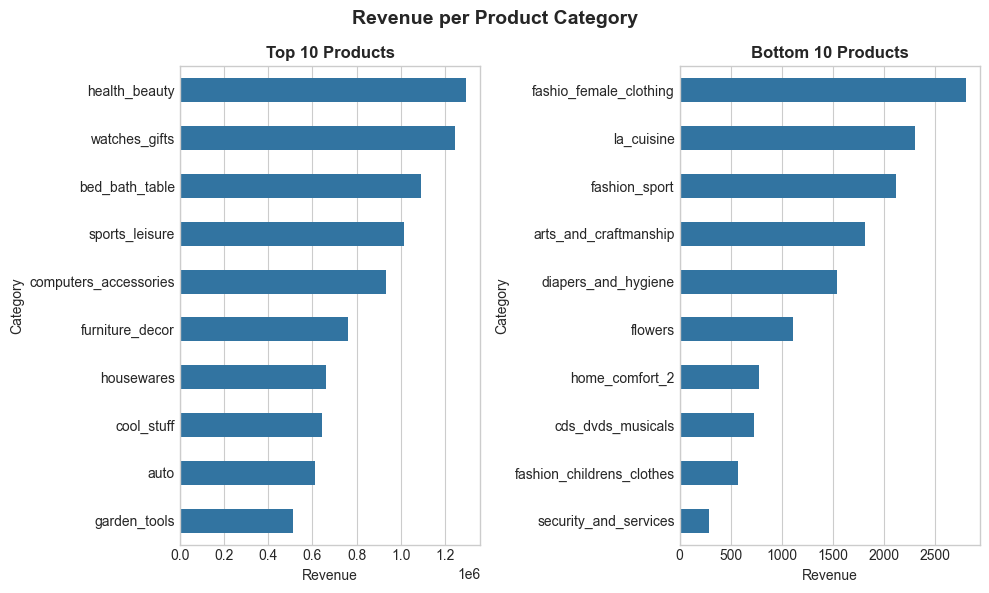

In [33]:
# Create figure and axes
fig, ax = plt.subplots(ncols = 2, figsize = (10,6))

# Create barplot for top product
sns.barplot(data = revenue_per_category.head(10), y = "Category", x = "Revenue", width = 0.5, ax = ax[0])
ax[0].set_title("Top 10 Products", fontweight = "bold", fontsize = 12)

# Create barplot for top product
sns.barplot(data = revenue_per_category.tail(10), y = "Category", x = "Revenue", width = 0.5, ax = ax[1])
ax[1].set_title("Bottom 10 Products", fontweight = "bold", fontsize = 12)

fig.suptitle("Revenue per Product Category", fontsize = 14, fontweight = "bold")
fig.tight_layout()

plt.show()

Health Beauty, jam, perabotan rumah, serta perlengkapan olahraga merupakan kategori yang menghasilkan pendapatan terbesar untuk perusahaan, yaitu lebih dari 1 juta dollar, sedangkan alat-alat keamanan menghasilkan pendapatan yang sedikit, yaitu di bawah 500 dollar

### Pertanyaan 3: Kategori Produk apa yang banyak dan sedikit dibeli oleh customer?

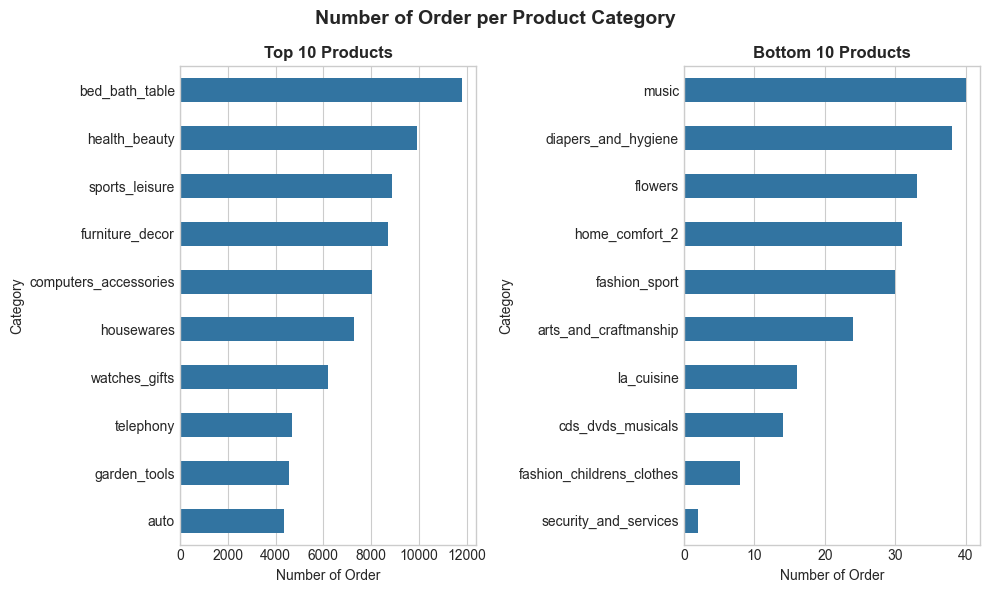

In [34]:
# Create figure and axes
fig, ax = plt.subplots(ncols = 2, figsize = (10,6))

# Create barplot for top product
sns.barplot(data = item_per_category.head(10), y = "Category", x = "Number of Order", width = 0.5, ax = ax[0])
ax[0].set_title("Top 10 Products", fontweight = "bold", fontsize = 12)

# Create barplot for top product
sns.barplot(data = item_per_category.tail(10), y = "Category", x = "Number of Order", width = 0.5, ax = ax[1])
ax[1].set_title("Bottom 10 Products", fontweight = "bold", fontsize = 12)

fig.suptitle("Number of Order per Product Category", fontsize = 14, fontweight = "bold")
fig.tight_layout()

plt.show()

Walaupun Health and Beauty menghasilkan pendapatan terbesar, tetapi customer lebih sering membeli peralatan meja, kasur, dan tempat tidur. Watch gifts memiliki daya tarik yang tidak begitu tinggi, hanya diurutan ke-7, tetapi memberikan impact yang tinggi pada pendapatan perusahaan. Security and services masih menjadi kategori yang paling tidak diminati oleh customer. Hal itu berbanding lurus dengan pendapatan yang dihasilkan oleh kategori security and services

### Pertanyaan 4: Kota apa saja yang paling banyak dan sedikit membeli produk kita?

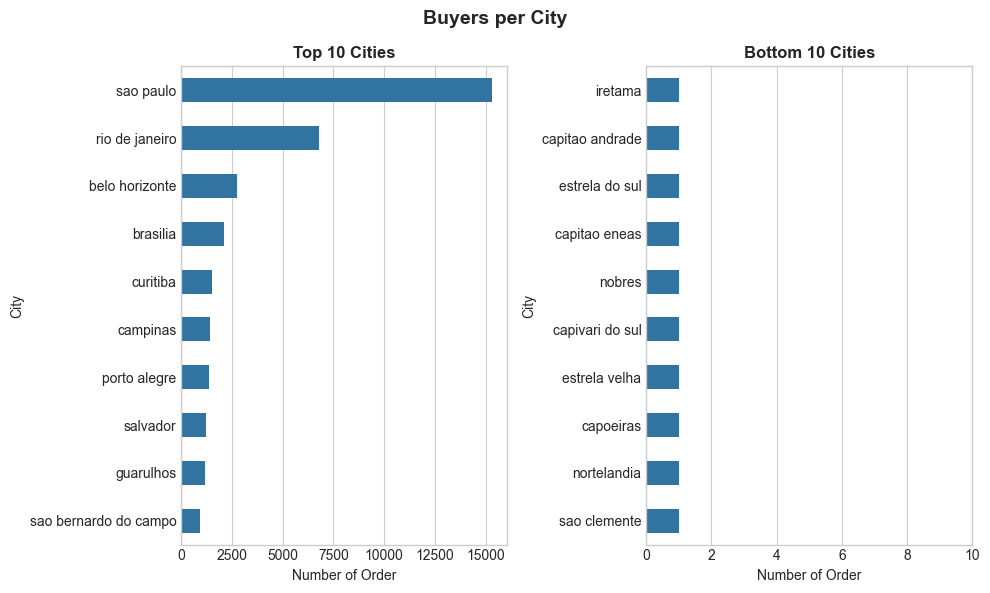

In [35]:
# Create figure and axes
fig, ax = plt.subplots(ncols = 2, figsize = (10,6))

# Create barplot for top product
sns.barplot(data = buyer_per_city.head(10), y = "City", x = "Number of Order", width = 0.5, ax = ax[0])
ax[0].set_title("Top 10 Cities", fontweight = "bold", fontsize = 12)

# Create barplot for top product
sns.barplot(data = buyer_per_city.tail(10), y = "City", x = "Number of Order", width = 0.5, ax = ax[1])
ax[1].set_title("Bottom 10 Cities", fontweight = "bold", fontsize = 12)
ax[1].set_xlim((0,10))

fig.suptitle("Buyers per City", fontsize = 14, fontweight = "bold")
fig.tight_layout()

plt.show()

Sao Paulo adalah kota yang paling banyak membeli produk perusahaan. Total order yang dihasilkan oleh customer di Sao Paulo lebih dari 15000 order. Jumlah tersebut merupakan 2 kali lipat dari order yang diterima dari Rio de Janeiro. Di sisi lain, Produk perusahaan kita belum diminati di beberapa kota, seperti Capoeiras, Nortealndia, Sao Clemente, dan 10 kota terbawah lainnya.

### Pertanyaan 5: Berapa perbandingan order yang sudah terkirim dan belum terkirim?

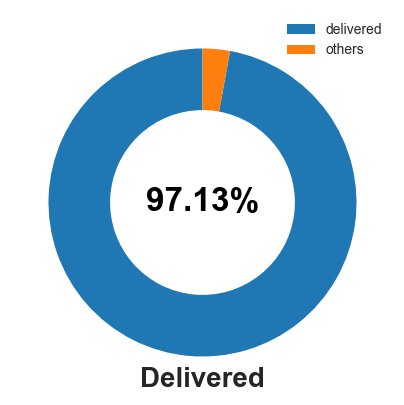

In [36]:
# Change the old values to new values
stat = all_df["order_status"].map({"delivered": "delivered", "invoiced" : "others",
                                   "shipped": "others", "processing": "others",
                                   "unavailable": "others", "canceled": "others",
                                   "created": "others", "approved": "others"}).value_counts()

# create figure and axes
fig, ax = plt.subplots(figsize = (5,5))

# create pie chart
ax.pie(stat, wedgeprops = {"width": 0.4}, startangle = 90)

ax.legend(stat.index)
# Add text in the middle
delivered_percent = stat["delivered"]/stat.sum()

# Add text at the center
plt.text(0, 0, f"{delivered_percent*100:.2f}%", fontsize=24, color='black', fontweight = "bold", ha='center', va='center')

# Add text at the bottom
plt.text(0, -1.2, 'Delivered', fontsize=20, ha='center', fontweight = "bold")

plt.show()

Mayoritas barang yang dipesan sudah terkirim ke customer

### Pertanyaan 6: Metode payment apa yang sering digunakan oleh customer?

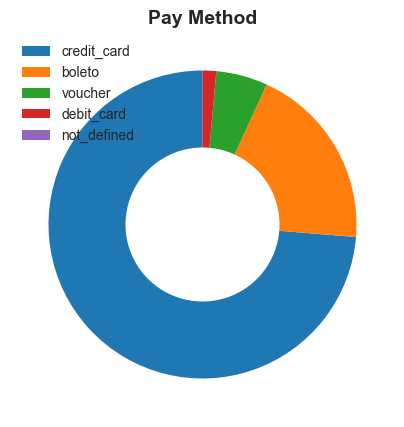

In [37]:
# create figure and axes
fig, ax = plt.subplots(figsize = (5,5))

# create pie chart
ax.pie(pay_method, wedgeprops = {"width": 0.5}, startangle = 90,
      textprops = {"fontweight" : "bold"})
ax.set_title("Pay Method", fontweight = "bold", fontsize = 14)
ax.legend(pay_method.index)

plt.show()

Mayoritas customer memberi produk kita menggunakan kartu kredit dan diikuti oleh boleto.

## Kesimpulan

- **Kesimpulan Pertanyaan 1**: <br>
Trend pendapatan perusahaan cenderung naik setiap bulannya, bahkan menyentuh lebih dari 1 juta dollar
- **Kesimpulan pertanyaan 2**: <br>
Health Beauty, jam, perabotan rumah, serta perlengkapan olahraga merupakan kategori yang menghasilkan pendapatan terbesar untuk perusahaan, yaitu lebih dari 1 juta dollar, sedangkan alat-alat keamanan menghasilkan pendapatan yang sedikit, yaitu di bawah 500 dollar
- **Kesimpulan Pertanyaan 3**: <br>
Walaupun Health and Beauty menghasilkan pendapatan terbesar, tetapi customer lebih sering membeli peralatan meja, kasur, dan tempat tidur. Watch gifts memiliki daya tarik yang tidak begitu tinggi, hanya diurutan ke-7, tetapi memberikan impact yang tinggi pada pendapatan perusahaan. Security and services masih menjadi kategori yang paling tidak diminati oleh customer. Hal itu berbanding lurus dengan pendapatan yang dihasilkan oleh kategori security and services
- **Kesimpulan Pertanyaan 4**: <br>
Sao Paulo adalah kota yang paling banyak membeli produk perusahaan. Di sisi lain, Produk perusahaan kita belum diminati di beberapa kota, seperti Capoeiras, Nortealndia, Sao Clemente, dan 10 kota terbawah lainnya.
- **Kesimpulan Pertanyaan 5**: <br>
Mayoritas barang sudah terkirim
- **Kesimpulan Pertanyaan 6**: <br>
Mayoritas customer memberi produk kita menggunakan kartu kredit dan diikuti oleh boleto.